本案例根据获取的二手车市场数据，对影响二手车价格的因素进行研究与分析。

In [1]:
#导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams[ 'font.sans-serif'] = 'SimHei'

In [2]:
# 读入数据
data = pd.read_csv('E:/second_cars_info.csv',encoding ='GB2312')

In [3]:
# 数据预览
data.head()

,Brand,Name,Boarding_time,Km,Sec_price,New_price
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,6.90,50.89万
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,8.88,50.89万
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,3.82,54.24万
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,44.80,101.06万
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,33.19,54.99万


In [4]:
# 查看是否存在缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11281 entries, 0 to 11280
Data columns (total 6 columns):
Brand            11281 non-null object
Name             11281 non-null object
Boarding_time    11281 non-null object
Km               11281 non-null object
Sec_price        11281 non-null float64
New_price        11281 non-null object
dtypes: float64(1), object(5)
memory usage: 528.9+ KB


In [5]:
#计算Boarding_time为‘未上牌’的记录占总记录的概率
sum(np.where(data['Boarding_time'] == '未上牌',1,0))/data.shape[0]

0.00824395000443223

In [6]:
#未上牌数据占比较小，直接剔除
data = data.loc[data['Boarding_time'] != '未上牌',:]
data = data.reset_index(drop = True)

In [7]:
#Boarding_time处理成year,month列

#date = data['Boarding_time'].map(lambda x:x.split('年'))
#year_list = []
#month_list = []
#for i in date:
#    year_list.append(i[0])
#    month_list.append(i[1])
    
#data['year'] = pd.Series(year_list)
#data['month'] = pd.Series(month_list).map(lambda x:x[:-1])

data['month'] = data['Boarding_time'].str[5:-1]
data['year'] = data['Boarding_time'].str[:4]

In [8]:
# 提取出年和月后删除Boarding_time
data.drop('Boarding_time',1,inplace = True)

In [9]:
#去掉Km列的单位
data['Km'] = data['Km'].str[:-3]

In [10]:
# 计算Km为百公里内的数据占所有数据的比例
sum(np.where(data['Km'] == '百',1,0))/data.shape[0]

0.005631033249910619

In [11]:
#将Km为百公里内的数据替换为0.005万公里
data['Km'] = data['Km'].replace('百',0.005)

In [12]:
#New_price‘暂无’的占比
sum(np.where(data['New_price'] == '暂无',1,0))/data.shape[0]

0.012602788702180907

In [13]:
#‘暂无’做删除处理
data = data.loc[data['New_price'] != '暂无',:]

In [14]:
#将New_price种的‘万’去掉
data['New_price'] = data['New_price'].str[:-1]

In [16]:
#类型转换
data['Km'] = data['Km'].astype(float)
data['New_price'] = data['New_price'].astype(float)
data['month'] = data['month'].astype(float)
data['year'] = data['year'].astype(float)

In [17]:
#增加一列车龄
data['age'] = 2019-data.year

In [18]:
data.head()

,Brand,Name,Km,Sec_price,New_price,month,year,age
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,9.00,6.90,50.89,8.0,2006.0,13.0
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,8.00,8.88,50.89,1.0,2007.0,12.0
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,15.00,3.82,54.24,5.0,2005.0,14.0
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,4.80,44.80,101.06,10.0,2013.0,6.0
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,0.81,33.19,54.99,9.0,2014.0,5.0


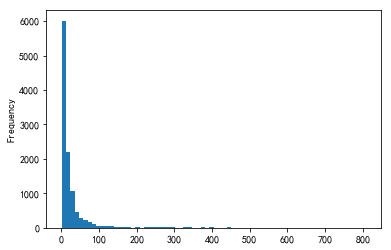

In [19]:
#二手车价格分布
data.Sec_price.plot.hist(bins = 70)

二手价格多数分布在0-30万，随着价格的增加二手车的数量减少

In [20]:
#二手价格分箱，查看各个区间的比例
sec_price_bins = pd.cut(data['Sec_price'],bins = [data['Sec_price'].min(), 3, 5, 8, 10, 15, 20, 30, 50,data['Sec_price'].max()])

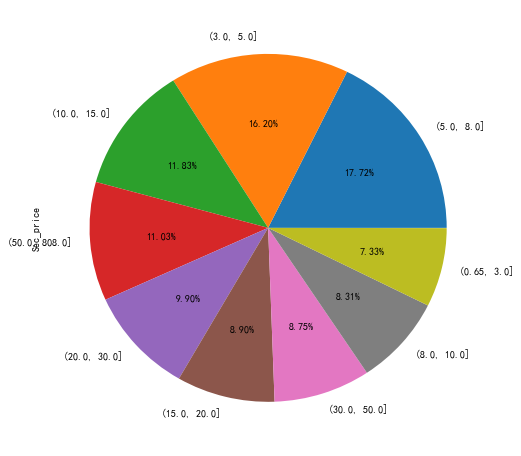

In [21]:
plt.figure(figsize = (8,8))
(sec_price_bins.value_counts()/data.shape[0]).plot.pie(autopct = '%1.2f%%')

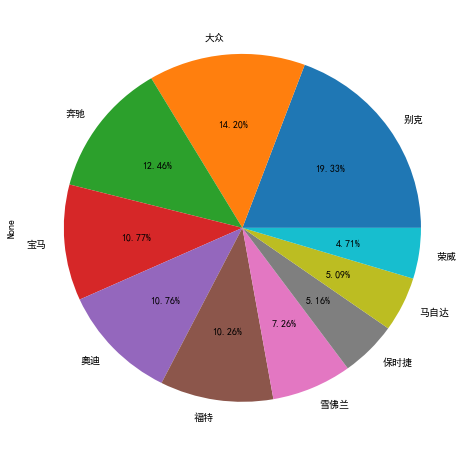

In [22]:
#数量占比较高的前十个品牌
brand_rank = data.groupby('Brand').size().sort_values(ascending = False)
plt.figure(figsize = (8,8))
brand_rank[:10].plot.pie(autopct = '%1.2f%%')

In [23]:
#二手价格受新车价格影响较大，增加一列残值率Salvage_rate，即二手价格/新车价格
data['Salvage_rate'] = data['Sec_price']/data['New_price']

In [34]:
#残值率与品牌的关系
brand_sal = data.groupby('Brand').Salvage_rate.mean().sort_values(ascending = False)
print('残值率较高的前十个品牌：',brand_sal.head(10))
print('残值率较低的前十个品牌：',brand_sal.tail(10))

残值率较高的前十个品牌： Brand
WEY        0.958549
华泰         0.888682
阿尔法・罗密欧    0.870885
特斯拉        0.858025
路特斯        0.843929
迈巴赫        0.794487
迈凯伦        0.793298
劳斯莱斯       0.759300
林肯         0.731674
开瑞         0.724095
Name: Salvage_rate, dtype: float64
残值率较低的前十个品牌： Brand
中欧房车    0.319762
莲花      0.317576
欧宝      0.310945
依维柯     0.302543
昌河      0.295567
马自达     0.293100
克莱斯勒    0.266878
江淮      0.261068
讴歌      0.255412
萨博      0.222331
Name: Salvage_rate, dtype: float64


残值率低意味着贬值更多，高端汽车较为保值。

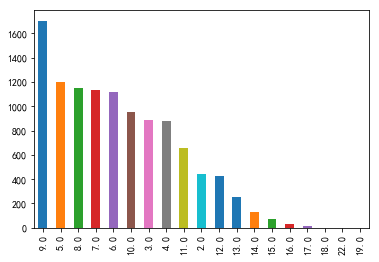

In [36]:
#车龄与二手车数量
data.age.value_counts().plot.bar()

车龄十年以内较多

In [38]:
#车龄与残值率的关系
data.groupby('age').Salvage_rate.mean()

age
2.0     0.823955
3.0     0.727772
4.0     0.665994
5.0     0.577435
6.0     0.500678
7.0     0.432936
8.0     0.370696
9.0     0.316569
10.0    0.277615
11.0    0.229837
12.0    0.195086
13.0    0.162361
14.0    0.135662
15.0    0.118947
16.0    0.097662
17.0    0.106016
18.0    0.039421
19.0    0.040185
22.0    0.153462
Name: Salvage_rate, dtype: float64

残值率随着车龄呈现降低的趋势

In [39]:
#行驶里程Km进行分箱，查看各区间的占比
Km_bins = pd.cut(data['Km'],bins = [data.Km.min(), 1, 3, 5, 10,data.Km.max()])

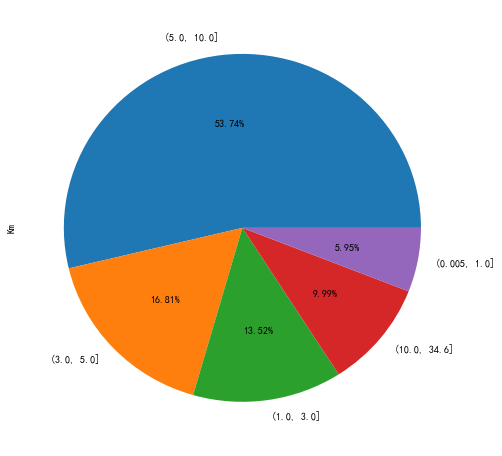

In [40]:
plt.figure(figsize = (8,8))
Km_bins.value_counts().plot.pie(autopct = '%1.2f%%')

行驶里程5-10万公里的占多数

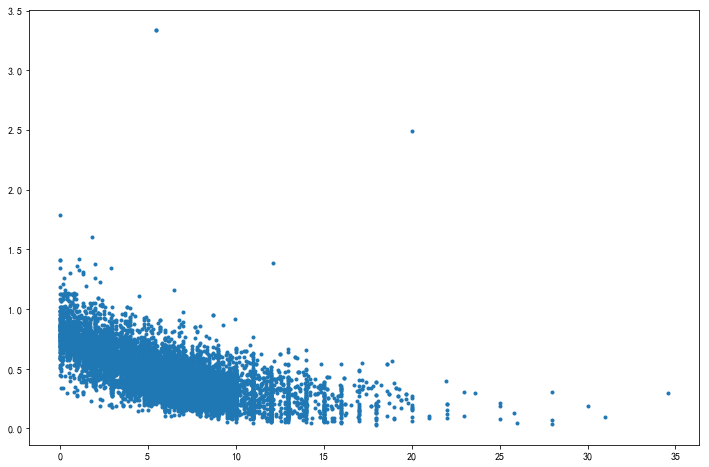

In [41]:
# 行驶里程与残值率的关系
plt.figure(figsize = (12,8))
plt.scatter(data['Km'],data['Salvage_rate'],marker = '.')

随着行驶里程的增加残差率在降低，呈现一定的线性关系。